# Import packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file into a pandas DataFrame
file_path = "C:/Users/lenovo1/Downloads/archive (7)/creditcard.csv"
df= pd.read_csv(file_path)

# General Information About to the Dataset


In [3]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [4]:
check_df(df)


######################### Head #########################
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458

# Data cleaning


In [3]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
df['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))


# CHECKING IMBALANCE

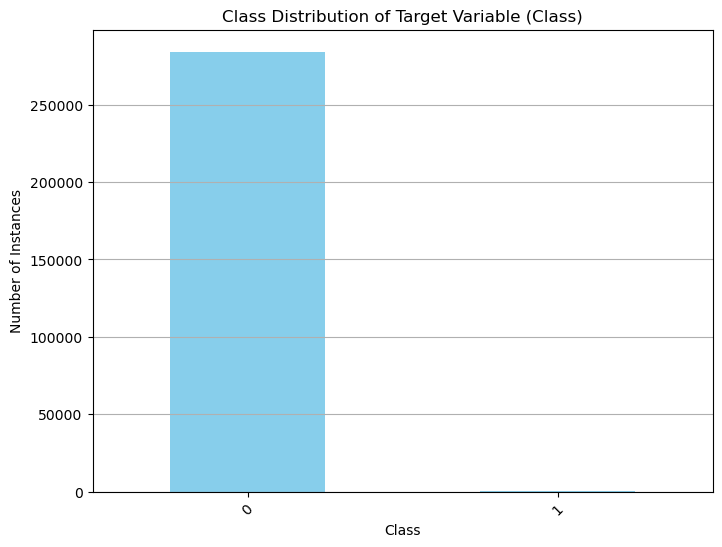

The target variable 'Class' is imbalanced.


In [4]:
# Assuming 'Class' is the target variable
target_column = 'Class'

# Count the occurrences of each class in the target variable
class_counts = df[target_column].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Target Variable (Class)')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Check if the target variable is imbalanced
# You can set a threshold for imbalance, for example, if one class is less than 5% of the total
threshold = 0.05
imbalance = any((class_counts / len(df)) < threshold)

if imbalance:
    print("The target variable 'Class' is imbalanced.")
else:
    print("The target variable 'Class' is not imbalanced.")

# Analysis of Categorical and Numerical Variables


In [6]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car

In [7]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

#Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")

Observations: 284807
Variables: 31
Cat_cols: 1
Num_cols: 30
Cat_but_car: 0


In [8]:
def cat_summary(dataframe,col_name,plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      'Ration': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##########################################")
  if plot:
    sns.countplot(x=dataframe[col_name],data=dataframe)
    plt.show(block=True)

In [9]:
def cat_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in cat_cols:
    cat_summary(dataframe, col, plot=True)

    Class     Ration
0  284315  99.827251
1     492   0.172749
##########################################


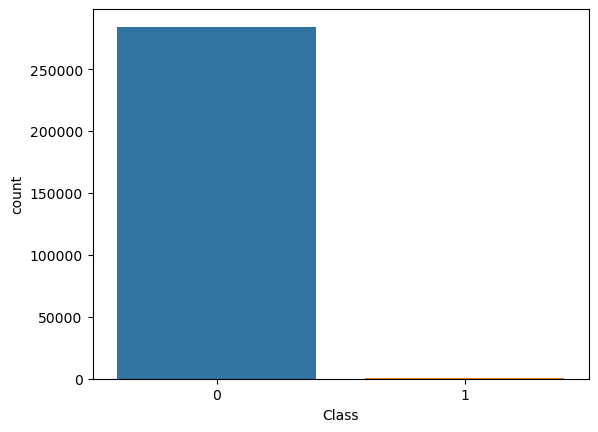

In [10]:
cat_summary_df(df)


In [11]:
def num_summary(dataframe, num_col, plot=False):
  quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.title(num_col)
    plt.show(block=True)
     

In [12]:
def num_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in num_cols:
    num_summary(dataframe, col, plot=True)
     

count    284807.000000
mean          0.118914
std           0.557903
min          -0.994983
1%           -0.966529
5%           -0.697781
10%          -0.583477
20%          -0.434660
30%          -0.280971
40%          -0.134290
50%           0.000000
60%           0.419460
70%           0.566701
80%           0.711425
90%           0.857017
95%           0.933416
99%           1.008810
max           1.035022
Name: Time, dtype: float64


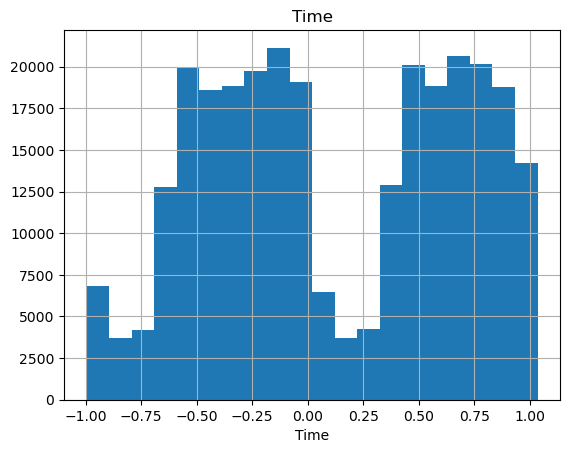

count    2.848070e+05
mean     1.168375e-15
std      1.958696e+00
min     -5.640751e+01
1%      -6.563199e+00
5%      -2.899147e+00
10%     -1.893272e+00
20%     -1.134663e+00
30%     -7.472943e-01
40%     -4.267559e-01
50%      1.810880e-02
60%      1.035107e+00
70%      1.224825e+00
80%      1.694936e+00
90%      2.015409e+00
95%      2.081223e+00
99%      2.237130e+00
max      2.454930e+00
Name: V1, dtype: float64


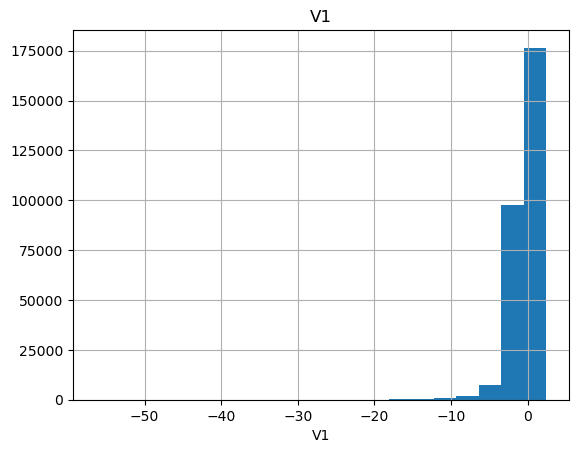

count    2.848070e+05
mean     3.416908e-16
std      1.651309e+00
min     -7.271573e+01
1%      -4.960300e+00
5%      -1.971975e+00
10%     -1.359862e+00
20%     -7.908142e-01
30%     -4.363931e-01
40%     -1.538049e-01
50%      6.548556e-02
60%      3.027378e-01
70%      6.368450e-01
80%      9.573136e-01
90%      1.326635e+00
95%      1.808585e+00
99%      3.801811e+00
max      2.205773e+01
Name: V2, dtype: float64


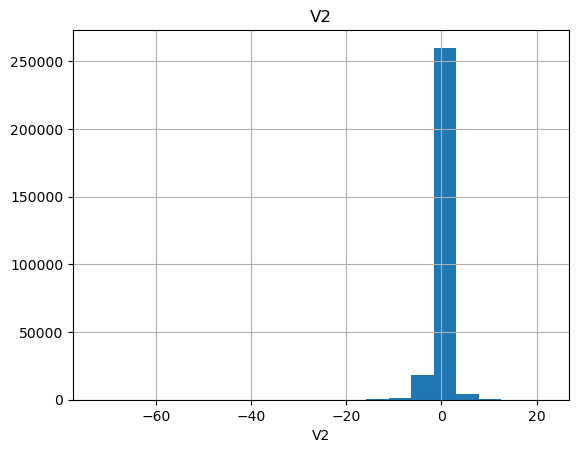

count    2.848070e+05
mean    -1.379537e-15
std      1.516255e+00
min     -4.832559e+01
1%      -3.978377e+00
5%      -2.389740e+00
10%     -1.802587e+00
20%     -1.169050e+00
30%     -6.168060e-01
40%     -1.990610e-01
50%      1.798463e-01
60%      4.970396e-01
70%      8.435405e-01
80%      1.215700e+00
90%      1.676173e+00
95%      2.062635e+00
99%      2.728434e+00
max      9.382558e+00
Name: V3, dtype: float64


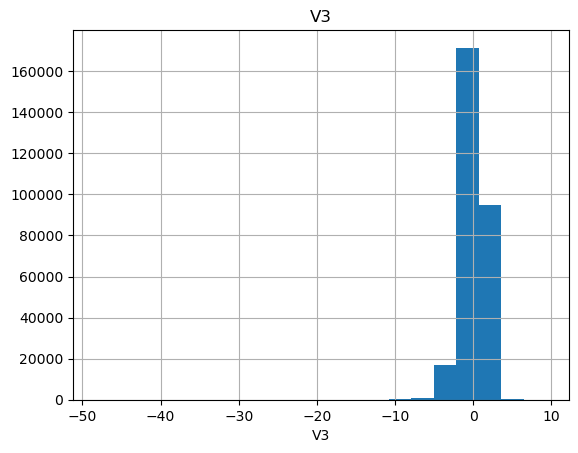

count    2.848070e+05
mean     2.074095e-15
std      1.415869e+00
min     -5.683171e+00
1%      -3.122987e+00
5%      -2.195683e+00
10%     -1.656329e+00
20%     -1.066085e+00
30%     -6.962262e-01
40%     -3.941610e-01
50%     -1.984653e-02
60%      2.848562e-01
70%      5.588663e-01
80%      9.861875e-01
90%      1.482807e+00
95%      2.566501e+00
99%      4.248032e+00
max      1.687534e+01
Name: V4, dtype: float64


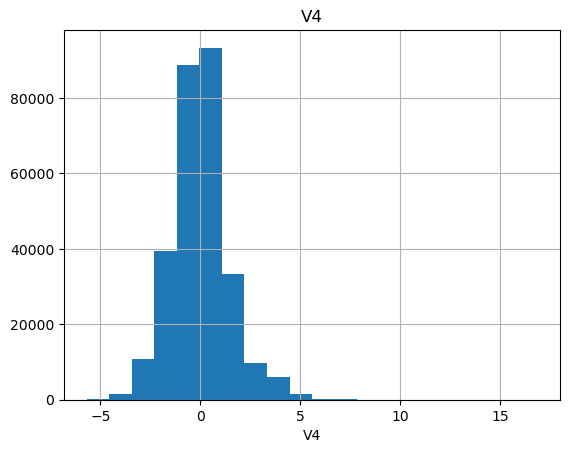

count    2.848070e+05
mean     9.604066e-16
std      1.380247e+00
min     -1.137433e+02
1%      -3.060396e+00
5%      -1.702021e+00
10%     -1.302171e+00
20%     -8.595815e-01
30%     -5.444552e-01
40%     -2.901118e-01
50%     -5.433583e-02
60%      1.866249e-01
70%      4.570287e-01
80%      8.022349e-01
90%      1.407893e+00
95%      2.098960e+00
99%      3.424903e+00
max      3.480167e+01
Name: V5, dtype: float64


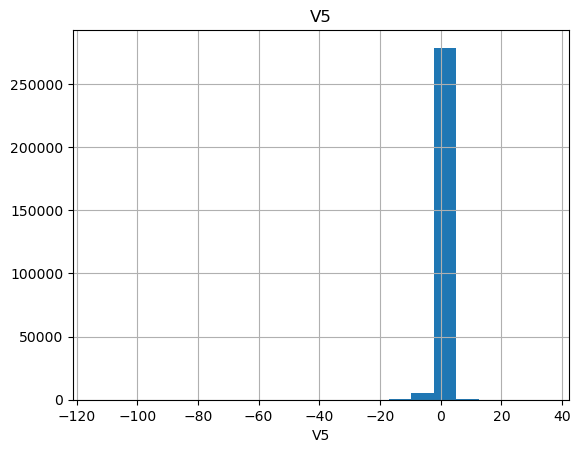

count    2.848070e+05
mean     1.487313e-15
std      1.332271e+00
min     -2.616051e+01
1%      -2.124023e+00
5%      -1.406757e+00
10%     -1.167450e+00
20%     -8.781527e-01
30%     -6.678449e-01
40%     -4.794725e-01
50%     -2.741871e-01
60%     -4.819964e-02
70%      2.232447e-01
80%      6.289952e-01
90%      1.509365e+00
95%      3.160382e+00
99%      4.200085e+00
max      7.330163e+01
Name: V6, dtype: float64


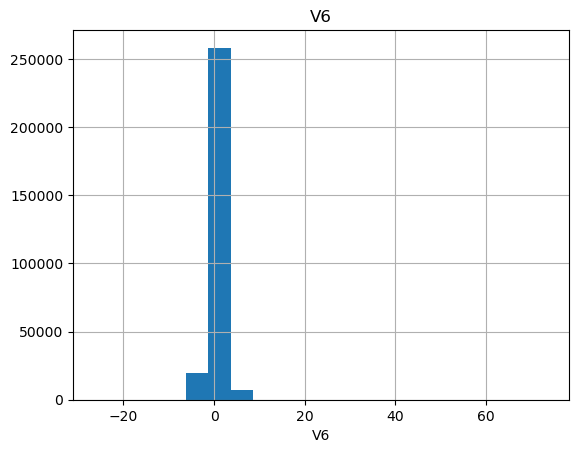

count    2.848070e+05
mean    -5.556467e-16
std      1.237094e+00
min     -4.355724e+01
1%      -3.012847e+00
5%      -1.434423e+00
10%     -1.078148e+00
20%     -6.833164e-01
30%     -4.260203e-01
40%     -1.593408e-01
50%      4.010308e-02
60%      2.135123e-01
70%      4.461749e-01
80%      6.983318e-01
90%      1.039387e+00
95%      1.407632e+00
99%      2.696205e+00
max      1.205895e+02
Name: V7, dtype: float64


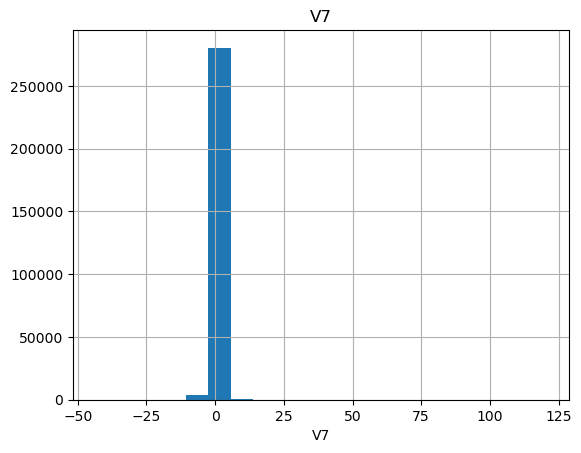

count    2.848070e+05
mean     1.213481e-16
std      1.194353e+00
min     -7.321672e+01
1%      -4.033899e+00
5%      -8.421469e-01
10%     -4.589454e-01
20%     -2.662999e-01
30%     -1.581584e-01
40%     -6.605715e-02
50%      2.235804e-02
60%      1.204889e-01
70%      2.434003e-01
80%      4.355289e-01
90%      7.693811e-01
95%      1.049984e+00
99%      2.075973e+00
max      2.000721e+01
Name: V8, dtype: float64


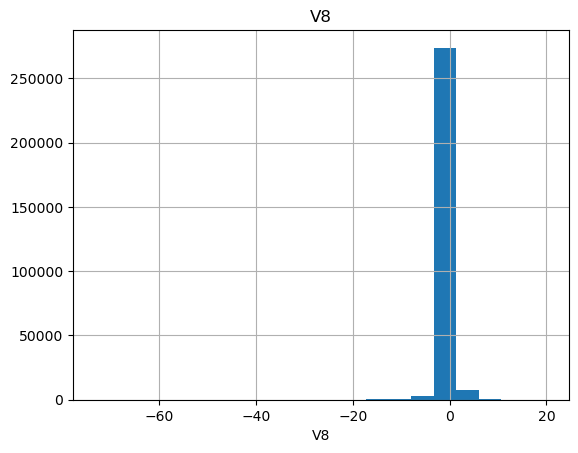

count    2.848070e+05
mean    -2.406331e-15
std      1.098632e+00
min     -1.343407e+01
1%      -2.455288e+00
5%      -1.758426e+00
10%     -1.294047e+00
20%     -8.088755e-01
30%     -5.021651e-01
40%     -2.577302e-01
50%     -5.142873e-02
60%      1.761695e-01
70%      4.459420e-01
80%      7.915832e-01
90%      1.301671e+00
95%      1.780783e+00
99%      2.986773e+00
max      1.559499e+01
Name: V9, dtype: float64


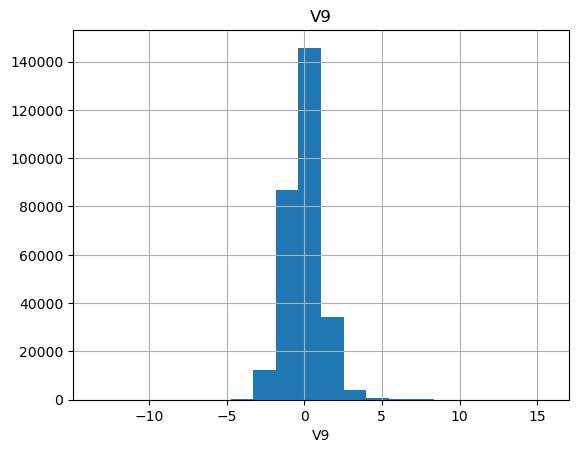

count    2.848070e+05
mean     2.239053e-15
std      1.088850e+00
min     -2.458826e+01
1%      -2.092670e+00
5%      -1.338636e+00
10%     -1.032158e+00
20%     -6.664809e-01
30%     -4.257577e-01
40%     -2.481867e-01
50%     -9.291738e-02
60%      5.950018e-02
70%      2.695355e-01
80%      6.482390e-01
90%      1.119759e+00
95%      1.548557e+00
99%      3.253618e+00
max      2.374514e+01
Name: V10, dtype: float64


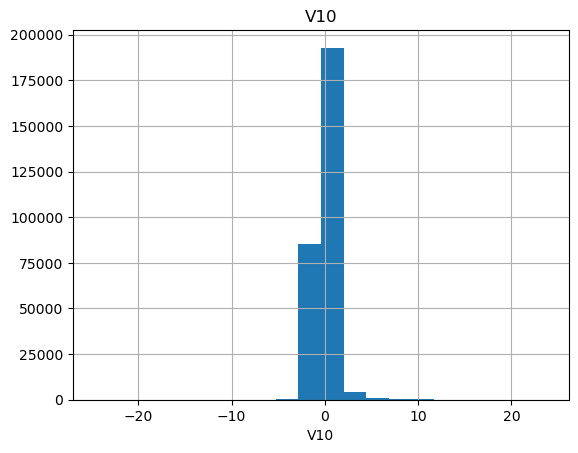

count    2.848070e+05
mean     1.673327e-15
std      1.020713e+00
min     -4.797473e+00
1%      -2.093086e+00
5%      -1.571901e+00
10%     -1.289015e+00
20%     -9.169940e-01
30%     -6.129743e-01
40%     -3.171382e-01
50%     -3.275735e-02
60%      2.678527e-01
70%      5.785726e-01
80%      9.132205e-01
90%      1.318588e+00
95%      1.614033e+00
99%      2.290583e+00
max      1.201891e+01
Name: V11, dtype: float64


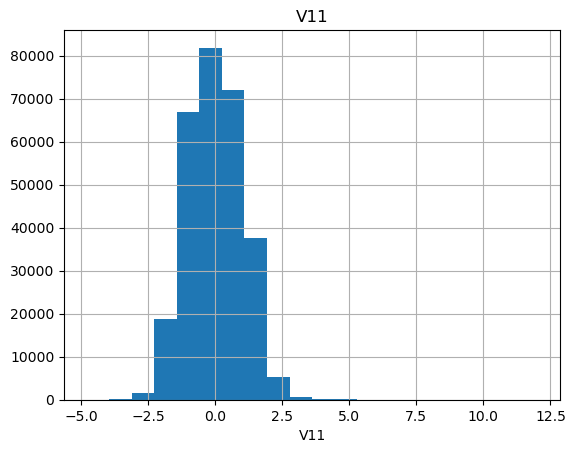

count    2.848070e+05
mean    -1.247012e-15
std      9.992014e-01
min     -1.868371e+01
1%      -3.063938e+00
5%      -1.967162e+00
10%     -1.148031e+00
20%     -5.730710e-01
30%     -2.719676e-01
40%     -5.045118e-02
50%      1.400326e-01
60%      3.247704e-01
70%      5.164565e-01
80%      7.306695e-01
90%      1.017274e+00
95%      1.243053e+00
99%      1.698576e+00
max      7.848392e+00
Name: V12, dtype: float64


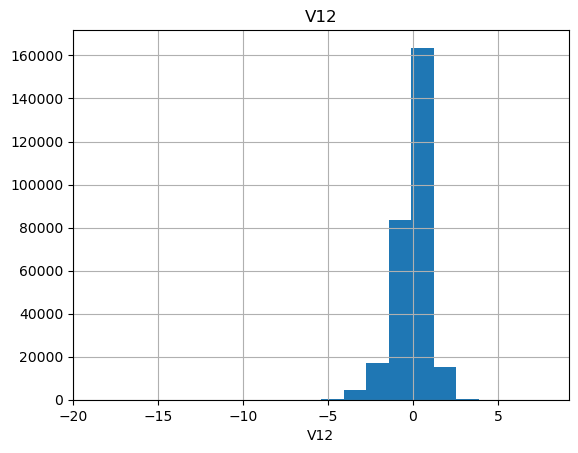

count    2.848070e+05
mean     8.190001e-16
std      9.952742e-01
min     -5.791881e+00
1%      -2.283101e+00
5%      -1.639729e+00
10%     -1.280012e+00
20%     -8.247022e-01
30%     -4.971726e-01
40%     -2.395771e-01
50%     -1.356806e-02
60%      2.287273e-01
70%      5.050463e-01
80%      8.290889e-01
90%      1.251841e+00
95%      1.607877e+00
99%      2.513962e+00
max      7.126883e+00
Name: V13, dtype: float64


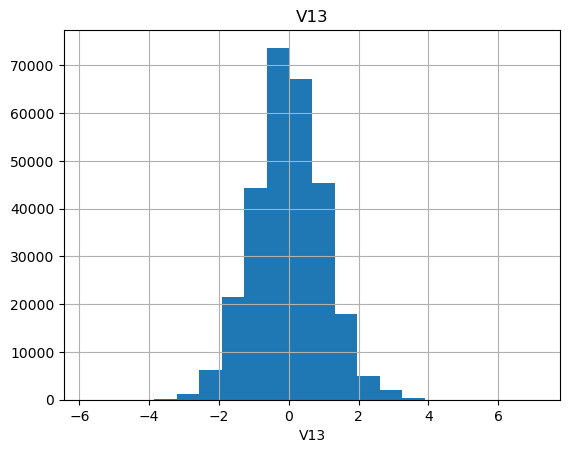

count    2.848070e+05
mean     1.207294e-15
std      9.585956e-01
min     -1.921433e+01
1%      -2.799763e+00
5%      -1.439351e+00
10%     -1.003676e+00
20%     -5.673035e-01
30%     -3.124565e-01
40%     -1.196655e-01
50%      5.060132e-02
60%      2.163083e-01
70%      3.938939e-01
80%      6.087367e-01
90%      9.814085e-01
95%      1.393653e+00
99%      2.150300e+00
max      1.052677e+01
Name: V14, dtype: float64


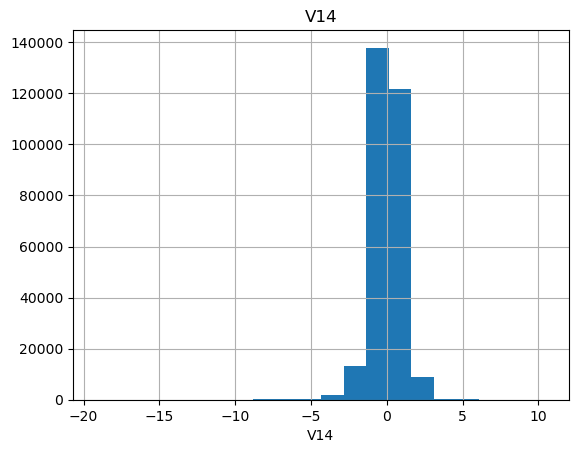

count    2.848070e+05
mean     4.887456e-15
std      9.153160e-01
min     -4.498945e+00
1%      -2.383923e+00
5%      -1.593200e+00
10%     -1.173945e+00
20%     -7.487495e-01
30%     -4.385696e-01
40%     -1.887507e-01
50%      4.807155e-02
60%      2.719566e-01
70%      5.137259e-01
80%      7.950543e-01
90%      1.124211e+00
95%      1.373090e+00
99%      1.925527e+00
max      8.877742e+00
Name: V15, dtype: float64


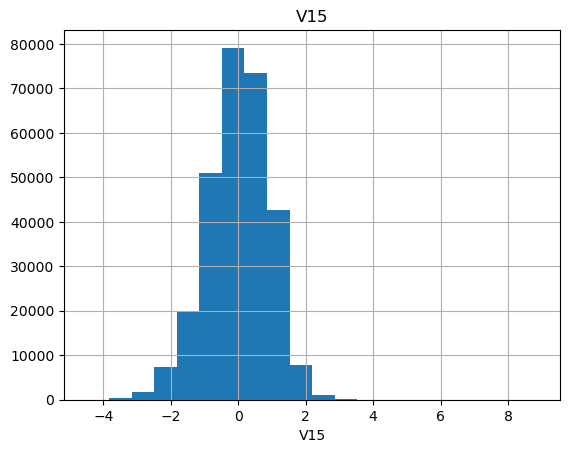

count    2.848070e+05
mean     1.437716e-15
std      8.762529e-01
min     -1.412985e+01
1%      -2.381823e+00
5%      -1.491663e+00
10%     -1.059361e+00
20%     -6.164855e-01
30%     -3.429957e-01
40%     -1.252125e-01
50%      6.641332e-02
60%      2.415156e-01
70%      4.264627e-01
80%      6.414430e-01
90%      9.908792e-01
95%      1.325253e+00
99%      1.874820e+00
max      1.731511e+01
Name: V16, dtype: float64


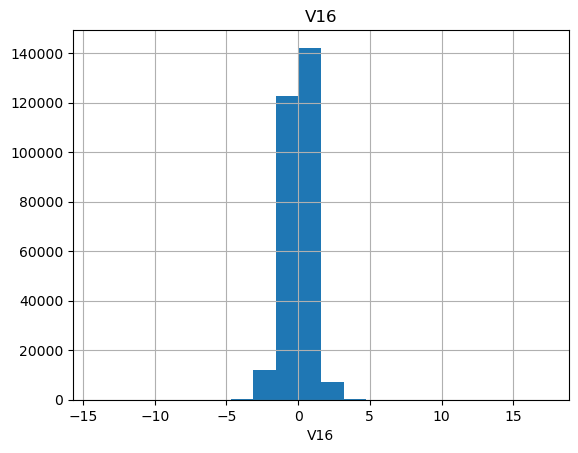

count    2.848070e+05
mean    -3.772171e-16
std      8.493371e-01
min     -2.516280e+01
1%      -1.349962e+00
5%      -9.830039e-01
10%     -8.042644e-01
20%     -5.757627e-01
30%     -3.969463e-01
40%     -2.355630e-01
50%     -6.567575e-02
60%      1.048739e-01
70%      2.967888e-01
80%      5.189160e-01
90%      9.086165e-01
95%      1.274609e+00
99%      2.289928e+00
max      9.253526e+00
Name: V17, dtype: float64


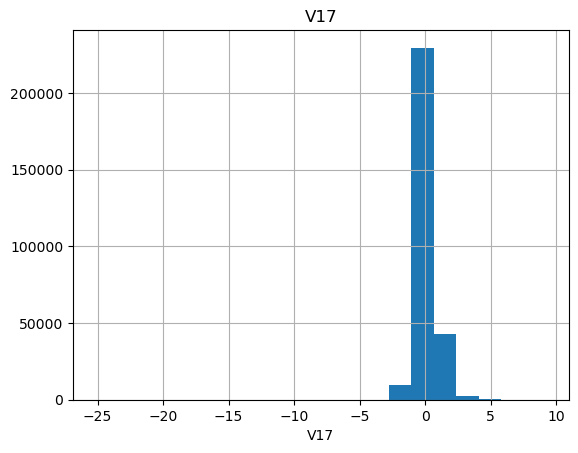

count    2.848070e+05
mean     9.564149e-16
std      8.381762e-01
min     -9.498746e+00
1%      -2.147067e+00
5%      -1.358094e+00
10%     -9.769348e-01
20%     -6.267061e-01
30%     -3.856909e-01
40%     -1.855848e-01
50%     -3.636312e-03
60%      1.820904e-01
70%      3.830896e-01
80%      6.374684e-01
90%      1.020455e+00
95%      1.394392e+00
99%      2.068689e+00
max      5.041069e+00
Name: V18, dtype: float64


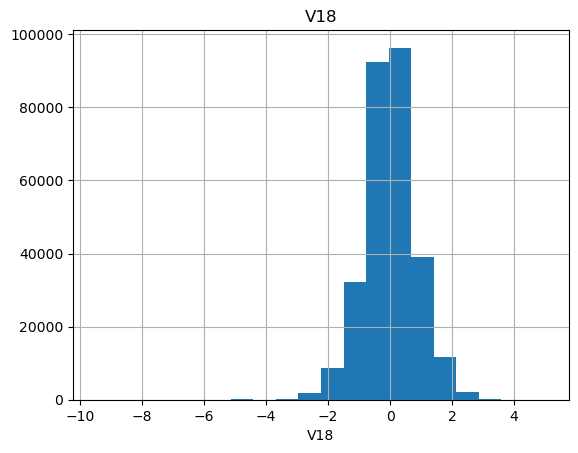

count    2.848070e+05
mean     1.039917e-15
std      8.140405e-01
min     -7.213527e+00
1%      -2.075516e+00
5%      -1.356259e+00
10%     -9.856163e-01
20%     -5.828234e-01
30%     -3.451006e-01
40%     -1.620252e-01
50%      3.734823e-03
60%      1.679275e-01
70%      3.482341e-01
80%      5.856940e-01
90%      9.538328e-01
95%      1.286164e+00
99%      2.262924e+00
max      5.591971e+00
Name: V19, dtype: float64


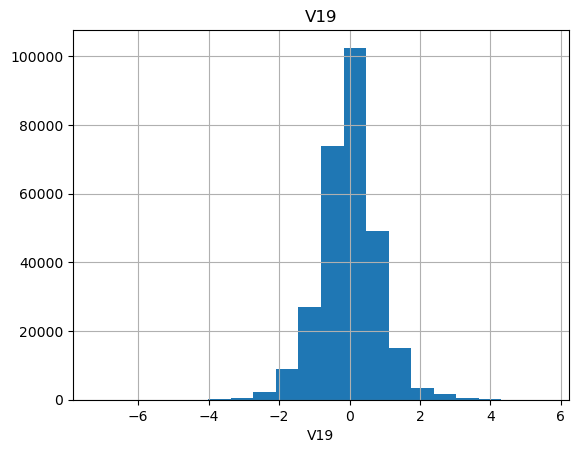

count    2.848070e+05
mean     6.406204e-16
std      7.709250e-01
min     -5.449772e+01
1%      -1.568406e+00
5%      -5.584349e-01
10%     -3.896021e-01
20%     -2.512018e-01
30%     -1.787040e-01
40%     -1.208067e-01
50%     -6.248109e-02
60%      4.307150e-03
70%      8.338735e-02
80%      1.957871e-01
90%      4.445929e-01
95%      8.361441e-01
99%      2.412190e+00
max      3.942090e+01
Name: V20, dtype: float64


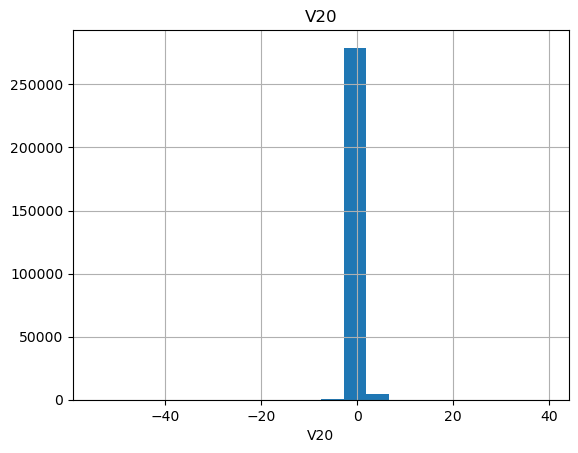

count    2.848070e+05
mean     1.654067e-16
std      7.345240e-01
min     -3.483038e+01
1%      -1.469679e+00
5%      -5.046735e-01
10%     -3.674467e-01
20%     -2.663929e-01
30%     -1.878180e-01
40%     -1.064266e-01
50%     -2.945017e-02
60%      5.038722e-02
70%      1.379046e-01
80%      2.354311e-01
90%      3.761555e-01
95%      5.378677e-01
99%      1.931852e+00
max      2.720284e+01
Name: V21, dtype: float64


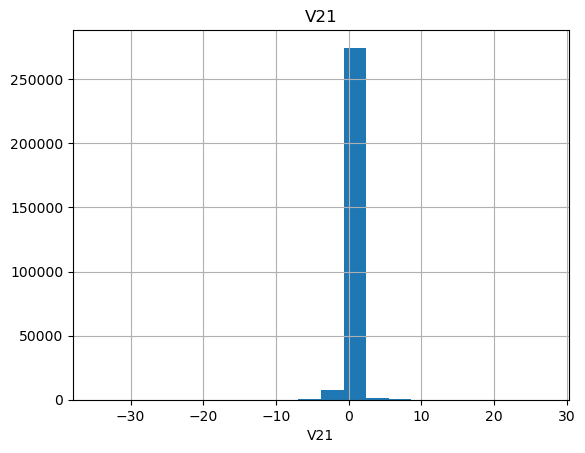

count    2.848070e+05
mean    -3.568593e-16
std      7.257016e-01
min     -1.093314e+01
1%      -1.654625e+00
5%      -1.081892e+00
10%     -8.674884e-01
20%     -6.416046e-01
30%     -4.344265e-01
40%     -2.018541e-01
50%      6.781943e-03
60%      2.005957e-01
70%      4.127470e-01
80%      6.485158e-01
90%      9.148826e-01
95%      1.128987e+00
99%      1.530152e+00
max      1.050309e+01
Name: V22, dtype: float64


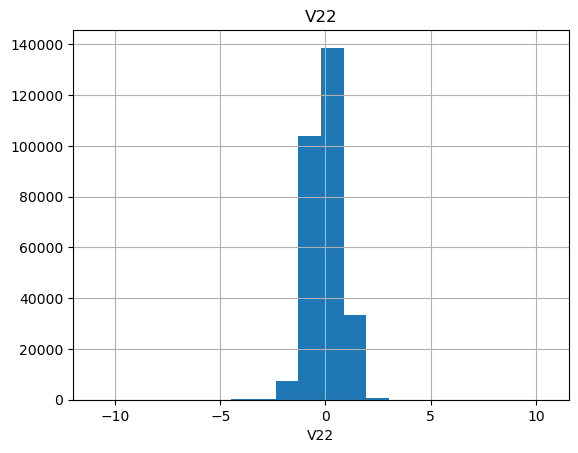

count    2.848070e+05
mean     2.578648e-16
std      6.244603e-01
min     -4.480774e+01
1%      -1.193417e+00
5%      -4.722464e-01
10%     -3.286342e-01
20%     -2.037425e-01
30%     -1.261571e-01
40%     -6.512670e-02
50%     -1.119293e-02
60%      4.484023e-02
70%      1.092714e-01
80%      1.942589e-01
90%      3.392860e-01
95%      4.880160e-01
99%      1.508703e+00
max      2.252841e+01
Name: V23, dtype: float64


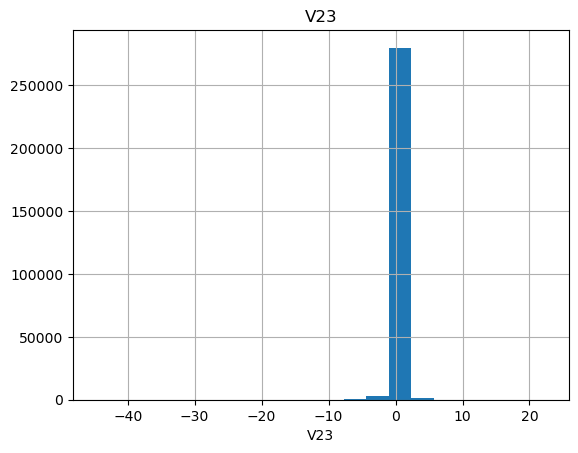

count    2.848070e+05
mean     4.473266e-15
std      6.056471e-01
min     -2.836627e+00
1%      -1.657308e+00
5%      -1.143662e+00
10%     -8.703584e-01
20%     -4.442769e-01
30%     -2.635025e-01
40%     -4.580667e-02
50%      4.097606e-02
60%      1.664115e-01
70%      3.742132e-01
80%      5.323465e-01
90%      7.054036e-01
95%      8.663576e-01
99%      1.063748e+00
max      4.584549e+00
Name: V24, dtype: float64


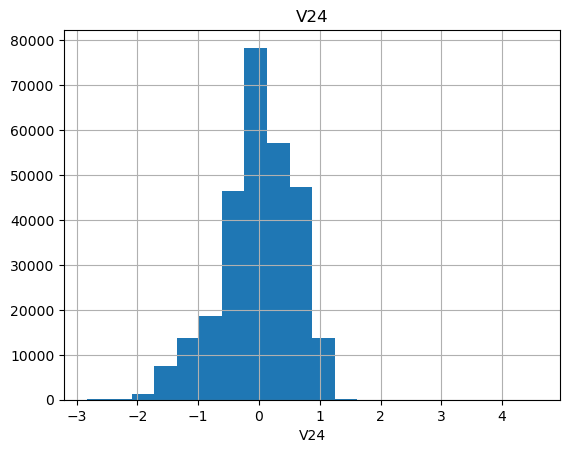

count    2.848070e+05
mean     5.340915e-16
std      5.212781e-01
min     -1.029540e+01
1%      -1.420859e+00
5%      -8.250264e-01
10%     -6.061010e-01
20%     -3.917190e-01
30%     -2.583651e-01
40%     -1.288661e-01
50%      1.659350e-02
60%      1.586211e-01
70%      2.849178e-01
80%      4.175428e-01
90%      6.009027e-01
95%      7.606986e-01
99%      1.203955e+00
max      7.519589e+00
Name: V25, dtype: float64


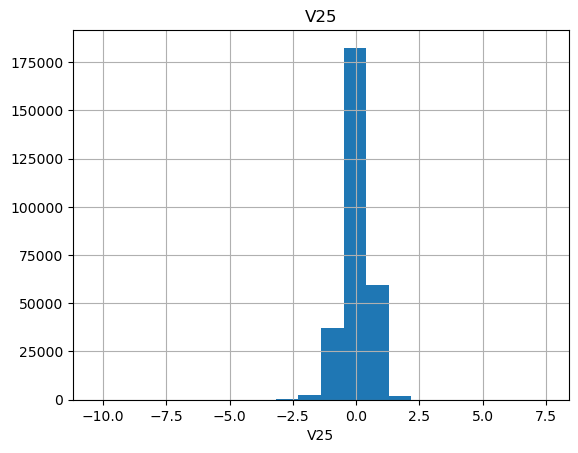

count    2.848070e+05
mean     1.683437e-15
std      4.822270e-01
min     -2.604551e+00
1%      -1.009384e+00
5%      -6.973483e-01
10%     -5.480343e-01
20%     -3.895481e-01
30%     -2.744373e-01
40%     -1.663338e-01
50%     -5.213911e-02
60%      8.611185e-02
70%      1.751137e-01
80%      3.602736e-01
90%      6.889469e-01
95%      9.209154e-01
99%      1.158698e+00
max      3.517346e+00
Name: V26, dtype: float64


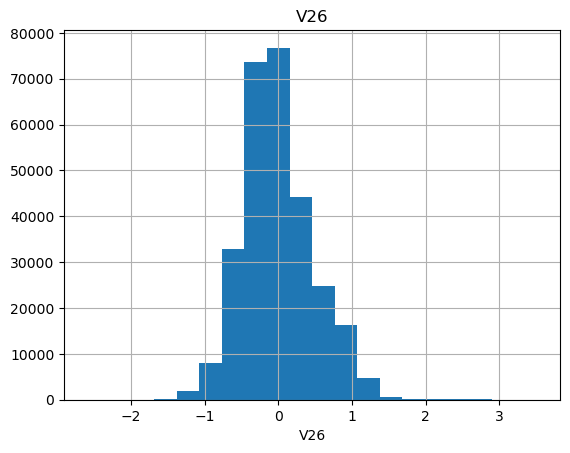

count    2.848070e+05
mean    -3.660091e-16
std      4.036325e-01
min     -2.256568e+01
1%      -1.247746e+00
5%      -4.152460e-01
10%     -2.114656e-01
20%     -9.111428e-02
30%     -5.423468e-02
40%     -2.436683e-02
50%      1.342146e-03
60%      2.922621e-02
70%      6.315093e-02
80%      1.352785e-01
90%      2.653679e-01
95%      3.877462e-01
99%      9.313604e-01
max      3.161220e+01
Name: V27, dtype: float64


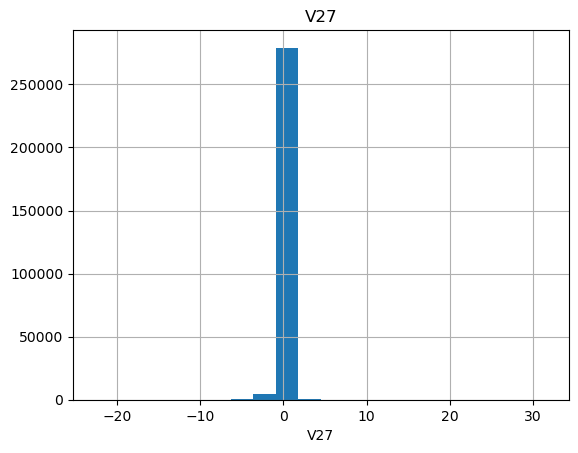

count    2.848070e+05
mean    -1.227390e-16
std      3.300833e-01
min     -1.543008e+01
1%      -8.762654e-01
5%      -3.178432e-01
10%     -1.556155e-01
20%     -6.544115e-02
30%     -4.026708e-02
40%     -1.195983e-02
50%      1.124383e-02
60%      2.692801e-02
70%      5.350104e-02
80%      1.013742e-01
90%      1.799362e-01
95%      2.560897e-01
99%      5.411264e-01
max      3.384781e+01
Name: V28, dtype: float64


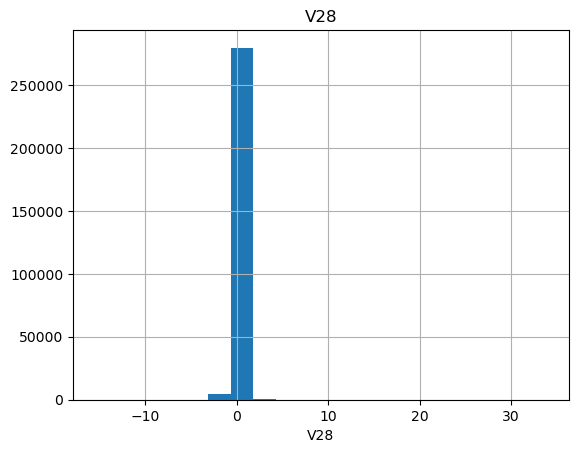

count    284807.000000
mean          0.927124
std           3.495006
min          -0.307413
1%           -0.305736
5%           -0.294557
10%          -0.293440
20%          -0.257528
30%          -0.182911
40%          -0.125760
50%           0.000000
60%           0.209600
70%           0.528191
80%           1.089918
90%           2.529169
95%           4.792846
99%          13.916999
max         358.683155
Name: Amount, dtype: float64


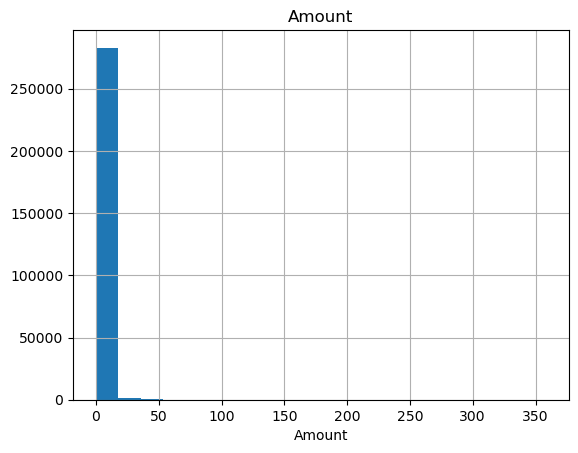

In [13]:
num_summary_df(df)


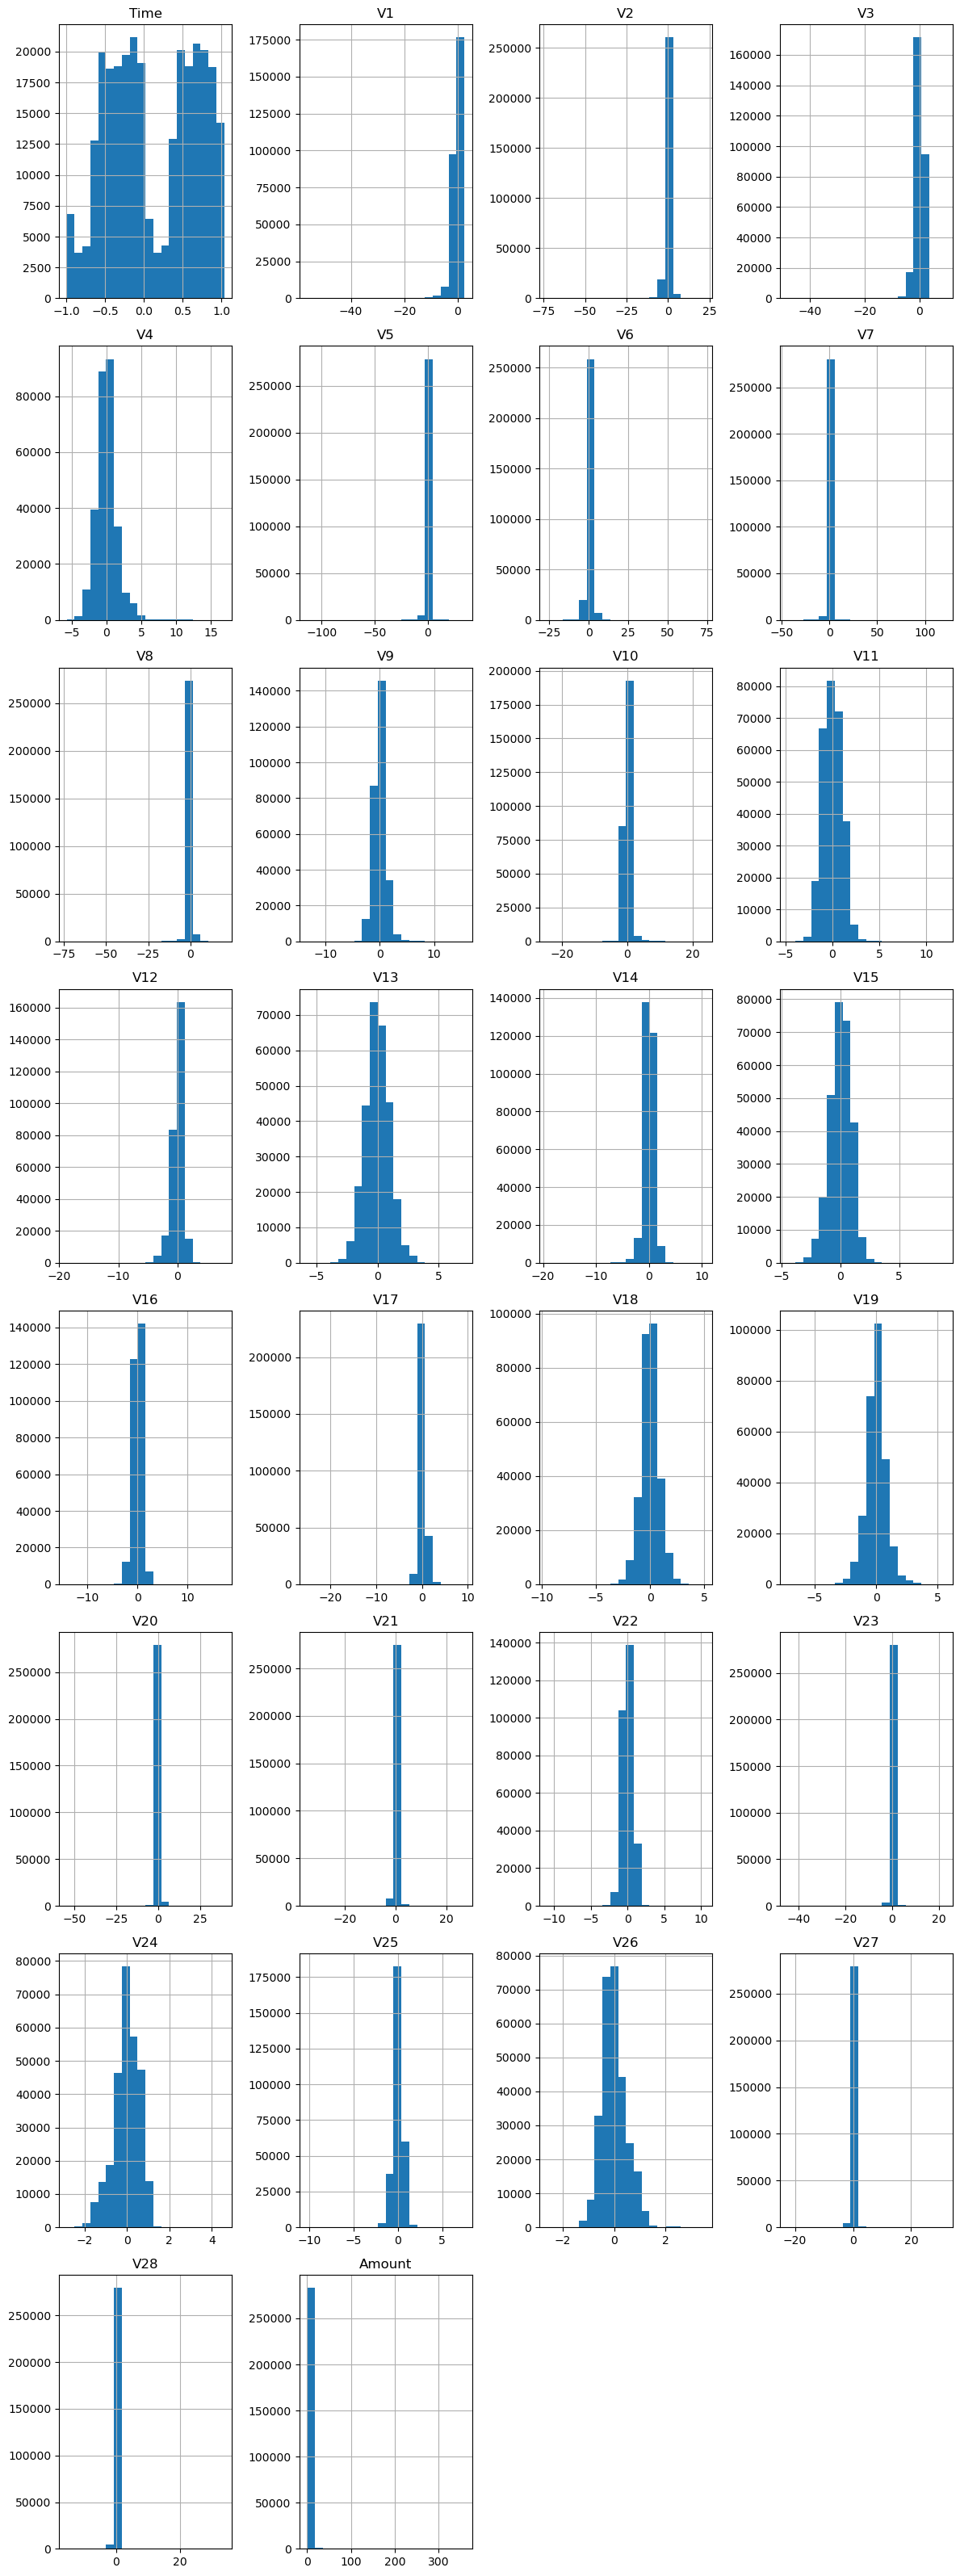

In [14]:
import matplotlib.pyplot as plt
import math

def plot_num_summary(dataframe):
    cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
    
    # Determine the number of rows and columns needed
    num_plots = len(num_cols)
    num_cols_grid = 4  # Fixed number of columns in grid
    num_rows_grid = math.ceil(num_plots / num_cols_grid)  # Calculate required rows
    
    plt.figure(figsize=(12, 4 * num_rows_grid))  # Adjust figure height based on rows
    
    for index, col in enumerate(num_cols):
        plt.subplot(num_rows_grid, num_cols_grid, index + 1)
        plt.tight_layout()
        dataframe[col].hist(bins=20)
        plt.title(col)

    plt.show()

# Example usage
plot_num_summary(df)


In [15]:
def target_summary_with_num(dataframe, target, numerical_col):
  print(dataframe.groupby(target).agg({numerical_col: "mean"}))
  print("#############################################")

In [16]:
def target_summary_with_num_df(dataframe, target):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in num_cols:
    target_summary_with_num(dataframe, target, col)
     

In [17]:
target_summary_with_num_df(df, "Class")


           Time
Class          
0      0.119200
1     -0.046349
#############################################
             V1
Class          
0      0.008258
1     -4.771948
#############################################
             V2
Class          
0     -0.006271
1      3.623778
#############################################
             V3
Class          
0      0.012171
1     -7.033281
#############################################
             V4
Class          
0     -0.007860
1      4.542029
#############################################
             V5
Class          
0      0.005453
1     -3.151225
#############################################
             V6
Class          
0      0.002419
1     -1.397737
#############################################
             V7
Class          
0      0.009637
1     -5.568731
#############################################
             V8
Class          
0     -0.000987
1      0.570636
#############################################
          

# Correlation Analysis


In [18]:
df.corr()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


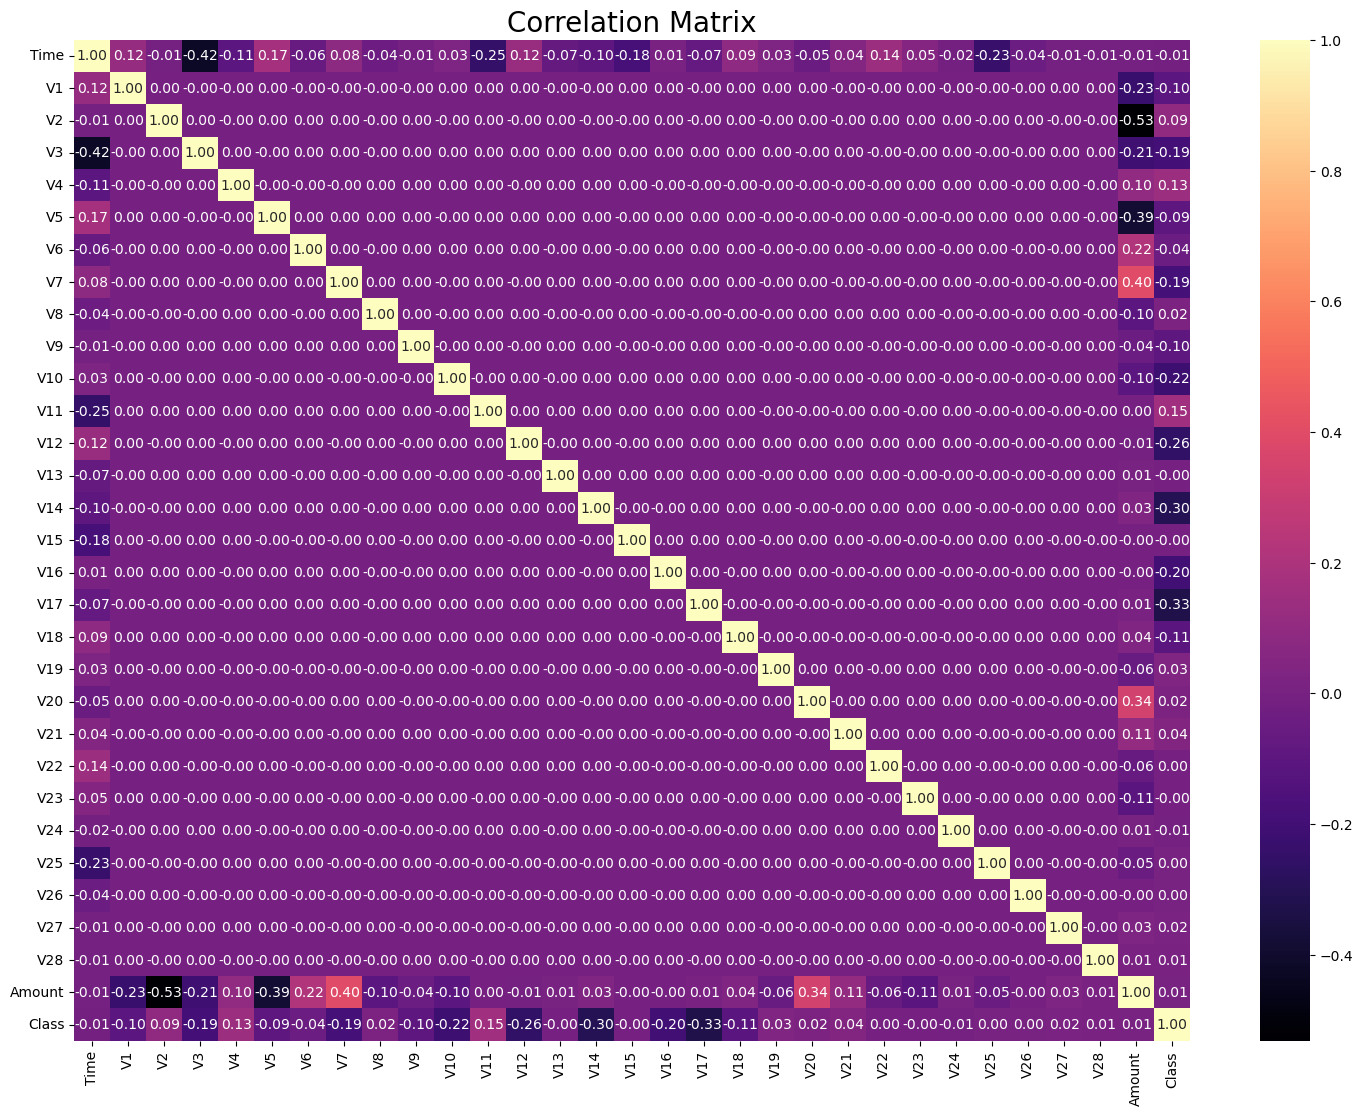

In [19]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [20]:
def high_correlated_cols(dataframe, plot=False, corr_th = 0.90):
  corr = dataframe.corr()
  corr_matrix = corr.abs()
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

  if drop_list == []:
    print("############## After Correlation Analysis, You Don't Need to Remove Variables ##############")

  if plot:
    sns.set(rc = {'figure.figsize':(18,13)})
    sns.heatmap(corr, cmap="RdBu")
    plt.show()
  return drop_list

############## After Correlation Analysis, You Don't Need to Remove Variables ##############


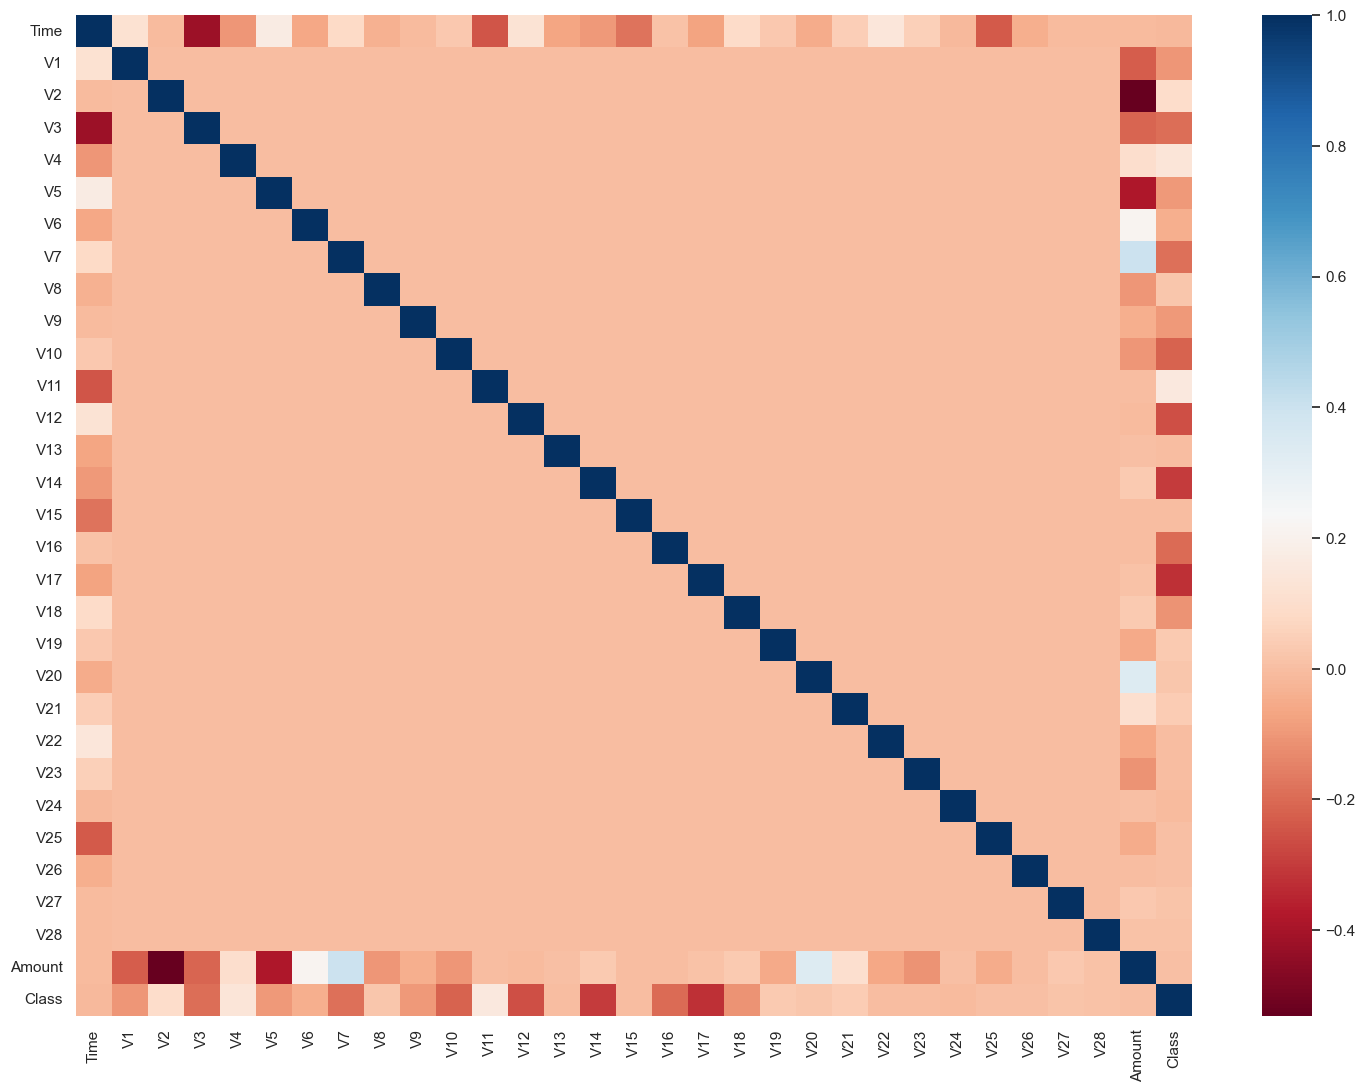

[]

In [21]:
high_correlated_cols(df, plot=True)


In [22]:
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Encoding and Scaling


In [4]:
def label_encoder(dataframe, binary_col):
  labelencoder = LabelEncoder()
  dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
  return dataframe

In [5]:

def label_encoder_dataframe(dataframe):
  binary_cols = [col for col in dataframe.columns if dataframe[col].dtype not in ["int", "float"] and dataframe[col].nunique() == 2]
  for col in binary_cols:
    label_encoder(dataframe, col)
     

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder_dataframe(df)


# Base Model

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score

def classification_algorithm(df, target, test_size=0.20, cv=10, results=True, conf_matrix=True, c_report=True, roc_plot=True):
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=123)
    
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }
    
    for name, clf in classifiers.items():
        print(f"\nClassifier: {name}")
        
        # Training the model
        clf.fit(X_train, y_train)
        
        # Predicting the test set results
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
        
        # Calculating accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        
        # Classification report
        if c_report:
            print("Classification Report:")
            print(classification_report(y_test, y_pred))
        
        # Confusion Matrix
        if conf_matrix:
            cm = confusion_matrix(y_test, y_pred)
            print("Confusion Matrix:")
            print(cm)
        
        # AUC and ROC Curve
        if roc_plot and y_pred_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            print(f"AUC: {roc_auc:.4f}")
        
        # F1 Scores for positive and negative classes
        f1_positive = f1_score(y_test, y_pred, pos_label=1)
        f1_negative = f1_score(y_test, y_pred, pos_label=0)
        print(f"F1 Score (Positive): {f1_positive:.4f}")
        print(f"F1 Score (Negative): {f1_negative:.4f}")

# Example usage:
classification_algorithm(df, 'Class')



Classifier: Logistic Regression
Accuracy: 0.9990
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.83      0.61      0.70       115

    accuracy                           1.00     56962
   macro avg       0.92      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56833    14]
 [   45    70]]
AUC: 0.9774
F1 Score (Positive): 0.7035
F1 Score (Negative): 0.9995

Classifier: Naive Bayes
Accuracy: 0.9777
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56847
           1       0.07      0.83      0.13       115

    accuracy                           0.98     56962
   macro avg       0.54      0.91      0.56     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix:
[[55597  1250]
 [   19    96]]
AUC: 0.9625
F1 Score (Positive): 0.1314
F1

# 1.Resampling Methods  SMOTE TECHNIQUE

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import pandas as pd

def classification_algorithm_with_smote(df, target, test_size=0.20, cv=10, results=True, conf_matrix=True, c_report=True, roc_plot=True):
    X = df.drop(target, axis=1)
    y = df[target]
    
    # Applying SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=123)
    
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }
    
    for name, clf in classifiers.items():
        print(f"\nClassifier: {name}")
        
        # Training the model
        clf.fit(X_train, y_train)
        
        # Predicting the test set results
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
        
        # Calculating accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        
        # Classification report
        if c_report:
            print("Classification Report:")
            print(classification_report(y_test, y_pred))
        
        # Confusion Matrix
        if conf_matrix:
            cm = confusion_matrix(y_test, y_pred)
            print("Confusion Matrix:")
            print(cm)
        
        # AUC and ROC Curve
        if roc_plot and y_pred_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            print(f"AUC: {roc_auc:.4f}")
        
        # F1 Scores for positive and negative classes
        f1_positive = f1_score(y_test, y_pred, pos_label=1)
        f1_negative = f1_score(y_test, y_pred, pos_label=0)
        print(f"F1 Score (Positive): {f1_positive:.4f}")
        print(f"F1 Score (Negative): {f1_negative:.4f}")

# Example usage with SMOTE applied:
classification_algorithm_with_smote(df, 'Class')



Classifier: Logistic Regression
Accuracy: 0.9483
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56747
           1       0.97      0.92      0.95     56979

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

Confusion Matrix:
[[55385  1362]
 [ 4517 52462]]
AUC: 0.9892
F1 Score (Positive): 0.9469
F1 Score (Negative): 0.9496

Classifier: Naive Bayes
Accuracy: 0.9137
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     56747
           1       0.97      0.85      0.91     56979

    accuracy                           0.91    113726
   macro avg       0.92      0.91      0.91    113726
weighted avg       0.92      0.91      0.91    113726

Confusion Matrix:
[[55342  1405]
 [ 8415 48564]]
AUC: 0.9505
F1 Score (Positive): 0.9082
F1

After applying SMOTE, the performance of all classifiers has improved significantly. Particularly, the F1 scores and AUC values have substantially increased, indicating better performance in both class prediction and classification threshold selection. This suggests that handling class imbalance has effectively enhanced the models' ability to classify both positive and negative instances.

# 2. Class Weighting Method

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score

def classification_algorithm(df, target, test_size=0.20, cv=10, results=True, conf_matrix=True, c_report=True, roc_plot=True, apply_class_weights=False):
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=123)
    
    # Calculate class weights
    class_distribution = df[target].value_counts()
    total_samples = class_distribution.sum()
    class_weights = total_samples / (len(class_distribution) * class_distribution)
    class_weights = class_weights.to_dict()
    
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter=1000, class_weight=class_weights) if apply_class_weights else LogisticRegression(max_iter=1000),
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(class_weight=class_weights) if apply_class_weights else DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(class_weight=class_weights) if apply_class_weights else RandomForestClassifier()
    }
    
    for name, clf in classifiers.items():
        print(f"\nClassifier: {name}")
        
        # Training the model
        clf.fit(X_train, y_train)
        
        # Predicting the test set results
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
        
        # Calculating accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        
        # Classification report
        if c_report:
            print("Classification Report:")
            print(classification_report(y_test, y_pred))
        
        # Confusion Matrix
        if conf_matrix:
            cm = confusion_matrix(y_test, y_pred)
            print("Confusion Matrix:")
            print(cm)
        
        # AUC and ROC Curve
        if roc_plot and y_pred_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            print(f"AUC: {roc_auc:.4f}")
        
        # F1 Scores for positive and negative classes
        f1_positive = f1_score(y_test, y_pred, pos_label=1)
        f1_negative = f1_score(y_test, y_pred, pos_label=0)
        print(f"F1 Score (Positive): {f1_positive:.4f}")
        print(f"F1 Score (Negative): {f1_negative:.4f}")

# Example usage:
classification_algorithm(df, 'Class', apply_class_weights=True)





Classifier: Logistic Regression
Accuracy: 0.9768
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56847
           1       0.08      0.93      0.14       115

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix:
[[55532  1315]
 [    8   107]]
AUC: 0.9850
F1 Score (Positive): 0.1392
F1 Score (Negative): 0.9882

Classifier: Naive Bayes
Accuracy: 0.9777
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56847
           1       0.07      0.83      0.13       115

    accuracy                           0.98     56962
   macro avg       0.54      0.91      0.56     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix:
[[55597  1250]
 [   19    96]]
AUC: 0.9625
F1 Score (Positive): 0.1314
F1

Overall, there are fluctuations in performance metrics across classifiers in my view it became more generalizable

# 3.ANOMALY DETECTION:-  local Outlier Factor

In [10]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor

def classification_algorithm_with_pca_and_lof(df, target, test_size=0.20, n_components=None, random_state=123):
    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(df.drop(columns=target))
    X = pd.DataFrame(X_pca, columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)])
    y = df[target]
    
    # Apply Local Outlier Factor for outlier detection
    lof = LocalOutlierFactor(contamination=0.01)
    outliers = lof.fit_predict(X)
    X_no_outliers = X[outliers == 1]  # Selecting non-outliers
    y_no_outliers = y[outliers == 1]  # Selecting corresponding target values
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=test_size, random_state=random_state)
    
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=random_state),
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(random_state=random_state),
        'Random Forest': RandomForestClassifier(random_state=random_state)
    }
    
    for name, clf in classifiers.items():
        print(f"\nClassifier: {name}")
        
        # Training the model
        clf.fit(X_train, y_train)
        
        # Predicting the test set results
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
        
        # Calculating accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        
        # Classification report
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(cm)
        
        # AUC and ROC Curve
        if y_pred_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            print(f"AUC: {roc_auc:.4f}")
        
        # F1 Scores for positive and negative classes
        f1_positive = f1_score(y_test, y_pred, pos_label=1)
        f1_negative = f1_score(y_test, y_pred, pos_label=0)
        print(f"F1 Score (Positive): {f1_positive:.4f}")
        print(f"F1 Score (Negative): {f1_negative:.4f}")

# Example usage with your dataset
# Ensure you have a DataFrame `df` with your data and a target column 'Class'
# df = pd.read_csv('your_dataset.csv')  # Load your dataset
classification_algorithm_with_pca_and_lof(df, 'Class', n_components=3)



Classifier: Logistic Regression
Accuracy: 0.9987
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56307
           1       0.75      0.18      0.29        85

    accuracy                           1.00     56392
   macro avg       0.87      0.59      0.64     56392
weighted avg       1.00      1.00      1.00     56392

Confusion Matrix:
[[56302     5]
 [   70    15]]
AUC: 0.8788
F1 Score (Positive): 0.2857
F1 Score (Negative): 0.9993

Classifier: Naive Bayes
Accuracy: 0.9866
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56307
           1       0.04      0.35      0.07        85

    accuracy                           0.99     56392
   macro avg       0.52      0.67      0.53     56392
weighted avg       1.00      0.99      0.99     56392

Confusion Matrix:
[[55605   702]
 [   55    30]]
AUC: 0.8880
F1 Score (Positive): 0.0734
F1

AFTER APPLYING ANOMALY DETECTION:-

Looking closer, we see a significant class imbalance in the data. There are many more class 0 instances (56,847) compared to class 1 (115).
Before sampling, most models performed well on the majority class (class 0) but struggled with the minority class (class 1). This is reflected in the high F1-score for class 0 and low F1-score for class 1 (Logistic Regression: 0.9995 vs 0.7035).
After sampling, the performance on the minority class improved for most models (F1-score increased). This comes at the cost of a slight decrease in overall accuracy.

# BALANCED CSVS

In [14]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE

def preprocess_data(df, target, n_components=2, contamination=0.01, save_path=None):
    # Applying SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(df.drop(columns=[target]), df[target])

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE

def preprocess_data(df, target, n_components=2, contamination=0.01, save_path=None):
    # Applying SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(df.drop(columns=[target]), df[target])
    
    # Calculate class weights
    class_distribution = y_resampled.value_counts()
    total_samples = class_distribution.sum()
    class_weights = total_samples / (len(class_distribution) * class_distribution)
    class_weights = class_weights.to_dict()
    
    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_resampled)
    X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)])
    
    # Apply Local Outlier Factor for outlier detection
    lof = LocalOutlierFactor(contamination=contamination)
    outliers = lof.fit_predict(X_pca)
    X_no_outliers = X_pca_df[outliers == 1]  # Selecting non-outliers
    y_no_outliers = y_resampled[outliers == 1]  # Selecting corresponding target values
    
    # Save processed data to CSV files if save_path is provided
    if save_path:
        # Save resampled data after SMOTE
        pd.concat([X_resampled, y_resampled], axis=1).to_csv(f"{save_path}_resampled_after_smote.csv", index=False)
        
        # Save resampled data for class weights
        pd.concat([X_resampled, y_resampled], axis=1).to_csv(f"{save_path}_resampled_class_weights.csv", index=False)
        
        # Save resampled data for anomaly detection
        pd.concat([X_resampled, y_resampled], axis=1).to_csv(f"{save_path}_resampled_anomaly_detection.csv", index=False)
        
        # Save class weights
        pd.DataFrame(class_weights.items(), columns=['Class', 'Weight']).to_csv(f"{save_path}_class_weights.csv", index=False)
        
        # Save anomaly detection results
        pd.DataFrame(outliers, columns=['Outlier']).to_csv(f"{save_path}_anomaly_detection.csv", index=False)
    
    return X_no_outliers, y_no_outliers, class_weights

# Example usage:
preprocess_data(df, 'Churn', n_components=2, contamination=0.01, save_path="preprocessed_data")



(             PC1       PC2
 0      -9.470908  0.919506
 1      -9.474037  0.795930
 2      -9.586573  0.734079
 3      -9.615362  1.033334
 4      -9.424899  1.238085
 ...          ...       ...
 568625  5.010460 -3.741367
 568626  0.150159 -1.963156
 568627 -1.355337 -2.742918
 568628  2.221706 -2.298788
 568629  7.708622 -2.819503
 
 [562943 rows x 2 columns],
 0         0
 1         0
 2         0
 3         0
 4         0
          ..
 568625    1
 568626    1
 568627    1
 568628    1
 568629    1
 Name: Class, Length: 562943, dtype: int64,
 {0: 1.0, 1: 1.0})

# CONCLUSION:-

1.Baseline:

Accuracy: Varies depending on the classifier used. For example, logistic regression had an accuracy of 0.9483, while KNN had an accuracy of 0.9990.
Misclassification: There seems to be some misclassification, particularly with the minority class (class 1), as evidenced by lower precision, recall, and F1-score for class 1 compared to class 0.
SMOTE (Synthetic Minority Over-sampling Technique):

Accuracy: Improved from the baseline for some classifiers (e.g., logistic regression accuracy increased from 0.9483 to 0.9768).
Misclassification: SMOTE aims to address the imbalance in the dataset by generating synthetic samples for the minority class. This helps improve the model's ability to correctly classify instances of the minority class, as seen in the improved recall and F1-score for class 1. However, misclassification still exists, especially with a low precision for the minority class.

2.Class Weighting:

Accuracy: Shows varying results compared to both the baseline and SMOTE. For some classifiers, accuracy increased, while for others, it decreased.
Misclassification: Class weighting adjusts the loss function to penalize misclassifications of the minority class more than the majority class during training. This can help in improving the model's ability to handle the imbalanced classes. However, it may not completely resolve misclassification issues, as evidenced by the relatively low precision, recall, and F1-score for class 1 in some cases.

3.Anomaly Detection:

Accuracy: Shows varying results, but generally, it seems to perform worse compared to SMOTE and class weighting.
Misclassification: Anomaly detection techniques aim to detect outliers or anomalies, which may represent instances of the minority class. While it may help identify some instances of the minority class, it may not be as effective as SMOTE or class weighting in handling imbalanced datasets, leading to potential misclassification issues.